**Rex Technology**
**Task 1: Sentimental Analysis on text Data using NLP**

In [1]:
import nltk as n
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('/content/drive/MyDrive/training.csv',delimiter=',', encoding='ISO-8859-1')
df

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


,sentiment,text
0,0,is upset that he cant update his Facebook by t...
1,0,Kenichan I dived many times for the ball Manag...
2,0,my whole body feels itchy and like its on fire
3,0,nationwideclass no its not behaving at all im ...
4,0,Kwesidei not the whole crew
...,...,...
1048567,4,My GrandMa is making Dinenr with my Mum
1048568,4,Midmorning snack time A bowl of cheese noodles...
1048569,4,ShaDeLa same here say it like from the Termin...
1048570,4,DestinyHope im great thaanks wbuu


**Checking if any NULL value in data Checking any duplicated record**

In [3]:
df.isnull().sum()
df.duplicated().sum()


0

**Drop irrelevent columns**

In [4]:
df.drop(['date of the tweet','id of the tweet','query','user'],axis=1,inplace=True)

In [5]:
df.columns=['sentiment','text']
df

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1048567,4,My GrandMa is making Dinenr with my Mum
1048568,4,Mid-morning snack time... A bowl of cheese noo...
1048569,4,@ShaDeLa same here say it like from the Termi...
1048570,4,@DestinyHope92 im great thaanks wbuu?


**Countr for positive and negative sentiments**

In [6]:
a=df['sentiment'].value_counts()
a

0    799996
4    248576
Name: sentiment, dtype: int64

**Ploting Sentiment counts for positive which is 4 and negative which is 0.**

<Axes: xlabel='sentiment', ylabel='count'>

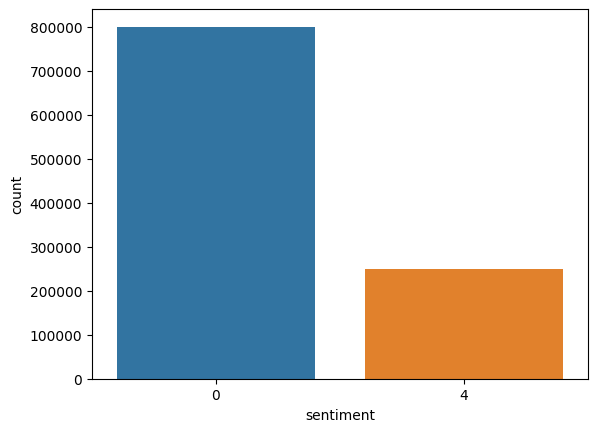

In [7]:
import seaborn as sns
sns.countplot(x=df.sentiment, data=df)

**Step 1 for preprocessing:-**
**Removing punctuation from Text Data.**

In [8]:
import re
punctuation_pattern = r'[!@#$%^&*()_+{}\[\]:;"\'<>,.?/\|\\-]'
df['text']=df['text'].apply(lambda text: re.sub(punctuation_pattern,'', text))

**Removing Numerical Value from the Text:-**

In [9]:
df['text'] = df['text'].str.replace(r'\d+', '')

<ipython-input-9-ffd3185662cf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'\d+', '')


In [10]:
df

,sentiment,text
0,0,is upset that he cant update his Facebook by t...
1,0,Kenichan I dived many times for the ball Manag...
2,0,my whole body feels itchy and like its on fire
3,0,nationwideclass no its not behaving at all im ...
4,0,Kwesidei not the whole crew
...,...,...
1048567,4,My GrandMa is making Dinenr with my Mum
1048568,4,Midmorning snack time A bowl of cheese noodles...
1048569,4,ShaDeLa same here say it like from the Termin...
1048570,4,DestinyHope im great thaanks wbuu


**Importing liberaries for the NLP Task for further processing:-**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Step 2:-**
**Tokenize the text column**

In [ ]:
df['text'] = df['text'].apply(lambda text: word_tokenize(text))
df

,sentiment,text
0,0,"[is, upset, that, he, cant, update, his, Faceb..."
1,0,"[Kenichan, I, dived, many, times, for, the, ba..."
2,0,"[my, whole, body, feels, itchy, and, like, its..."
3,0,"[nationwideclass, no, its, not, behaving, at, ..."
4,0,"[Kwesidei, not, the, whole, crew]"
...,...,...
1048567,4,"[My, GrandMa, is, making, Dinenr, with, my, Mum]"
1048568,4,"[Midmorning, snack, time, A, bowl, of, cheese,..."
1048569,4,"[ShaDeLa, same, here, say, it, like, from, the..."
1048570,4,"[DestinyHope, im, great, thaanks, wbuu]"


**Step 3:- Applying stemmer for converting words into root words.**

In [ ]:
stemmer =LancasterStemmer()
# Apply stemming to the tokenized text
def apply_stemming(tokens):
    return [stemmer.stem(text) for text in tokens]
df['text'] = df['text'].apply(apply_stemming)

In [ ]:
df

,sentiment,text
0,0,"[is, upset, that, he, cant, upd, his, facebook..."
1,0,"[kenich, i, div, many, tim, for, the, bal, man..."
2,0,"[my, whol, body, feel, itchy, and, lik, it, on..."
3,0,"[nationwideclass, no, it, not, behav, at, al, ..."
4,0,"[kweside, not, the, whol, crew]"
...,...,...
1048567,4,"[my, grandm, is, mak, dinenr, with, my, mum]"
1048568,4,"[midmorn, snack, tim, a, bowl, of, chees, nood..."
1048569,4,"[shadel, sam, her, say, it, lik, from, the, te..."
1048570,4,"[destinyhop, im, gre, thaank, wbuu]"


**Step 4:- Define and apply stopwords removal to remove irrelevant words e.g and,or,etc which have no meaning for analysis.**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,sentiment,text
0,0,"[upset, cant, upd, facebook, text, might, cry,..."
1,0,"[kenich, div, many, tim, bal, man, sav, rest, ..."
2,0,"[whol, body, feel, itchy, lik, fir]"
3,0,"[nationwideclass, behav, al, im, mad, becaus, ..."
4,0,"[kweside, whol, crew]"
...,...,...
1048567,4,"[grandm, mak, dinenr, mum]"
1048568,4,"[midmorn, snack, tim, bowl, chees, noodl, yum]"
1048569,4,"[shadel, sam, say, lik, terminy, movy, com, li..."
1048570,4,"[destinyhop, im, gre, thaank, wbuu]"


**Step 5: After preprocessing applying EDA on Data**

In [ ]:
positive = df[df['sentiment'] == 4]
positive_list = positive['text'].tolist()
negative = df[df['sentiment'] == 0]
negative_list = negative['text'].tolist()

In [ ]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

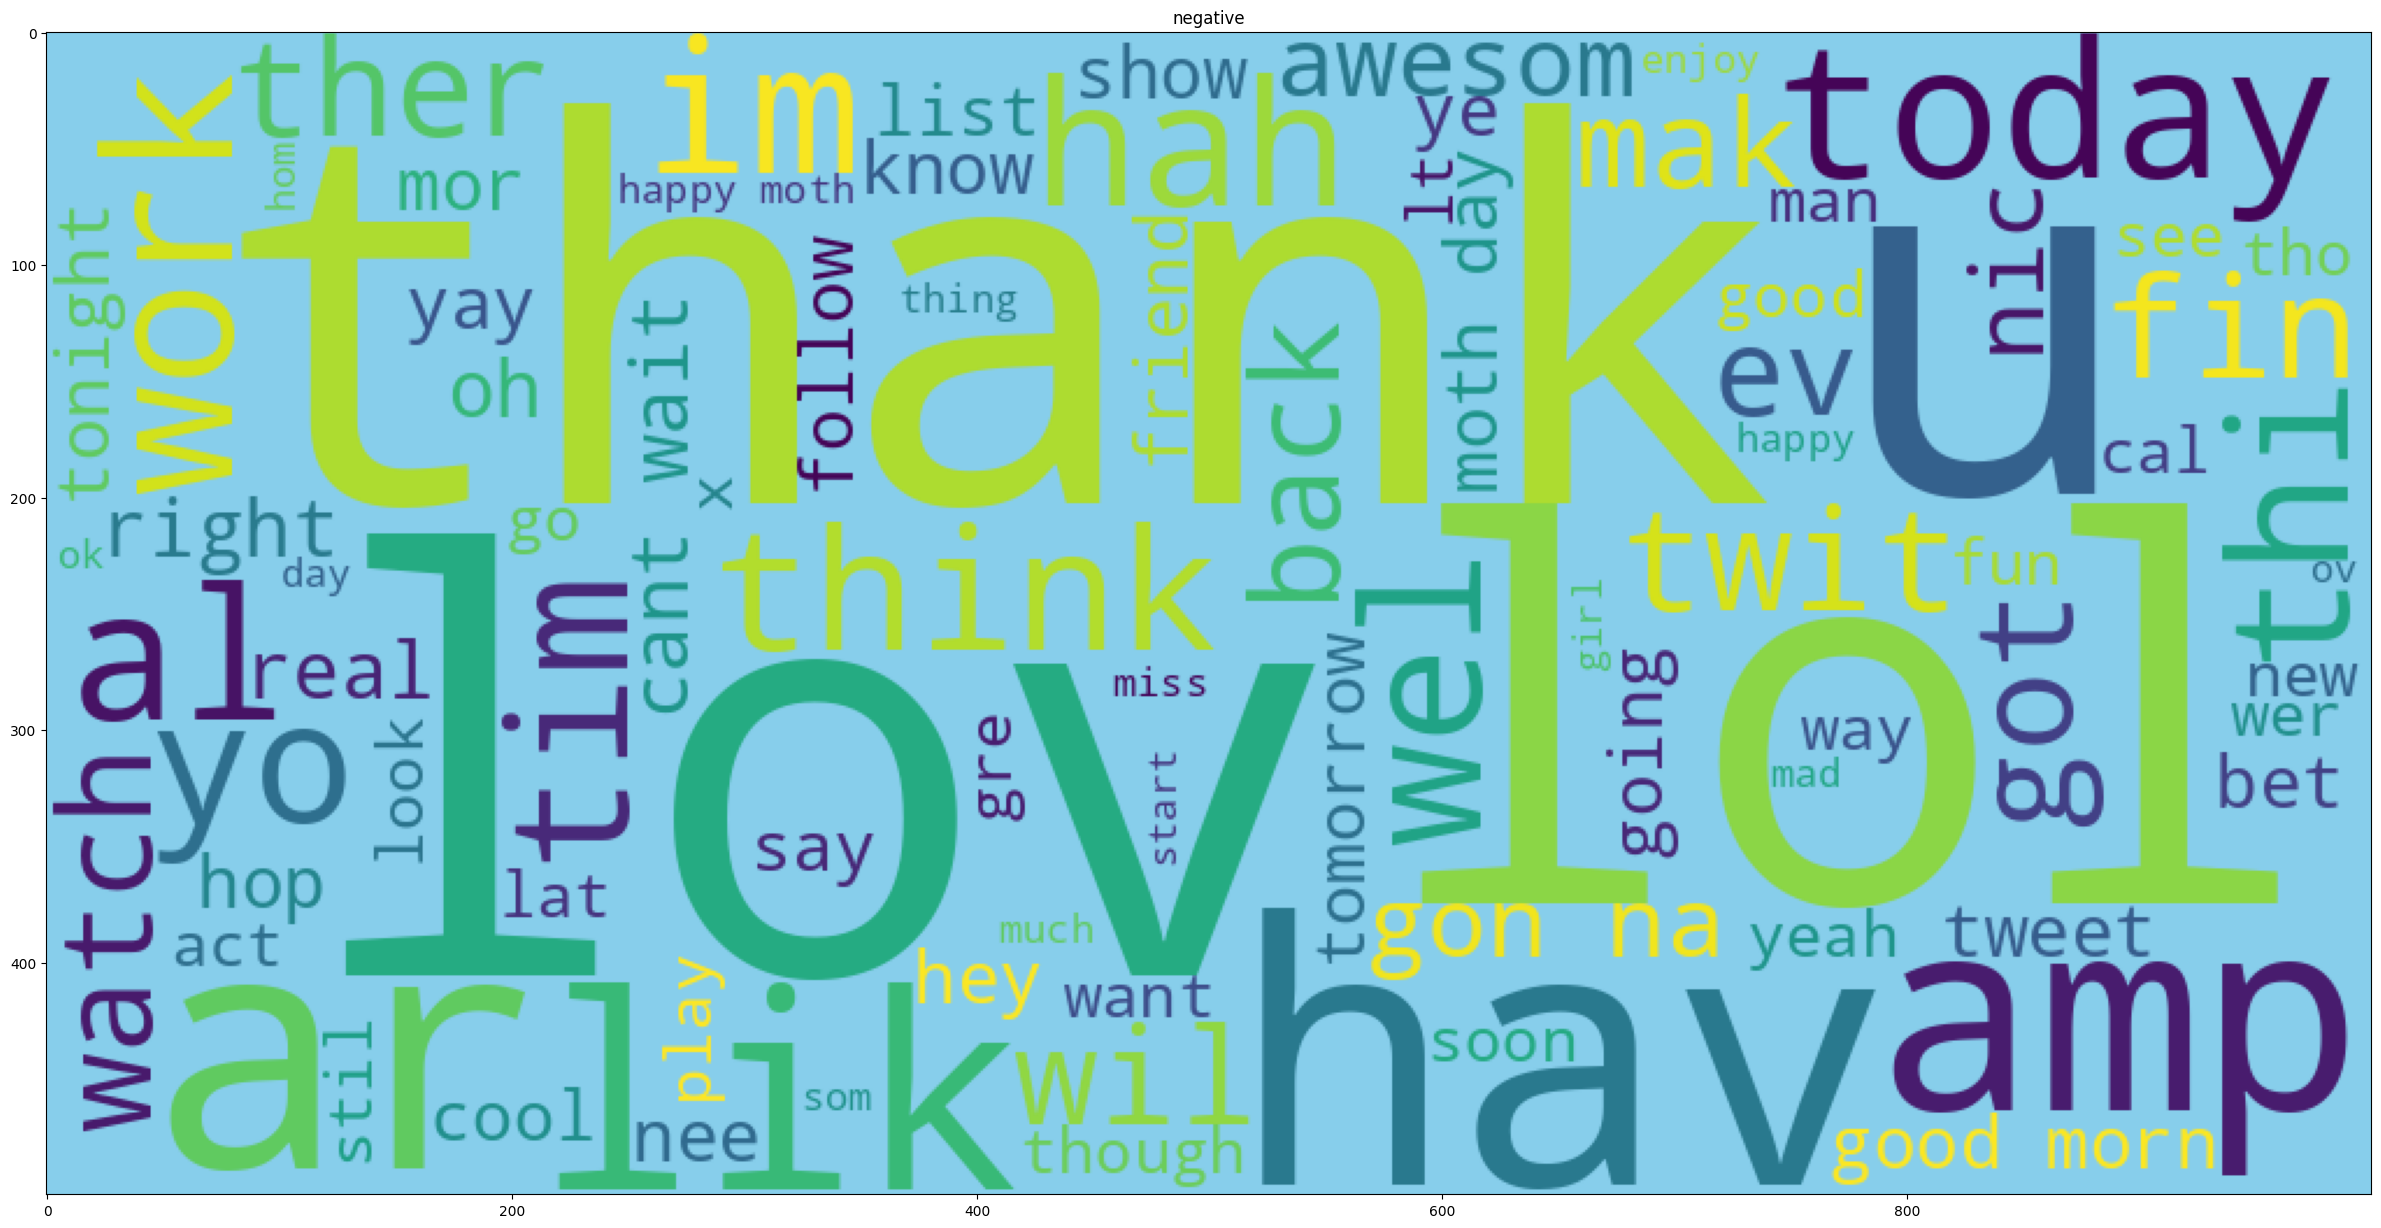

In [ ]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,height=500,background_color='skyblue',max_words = 90).generate(positive_all)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

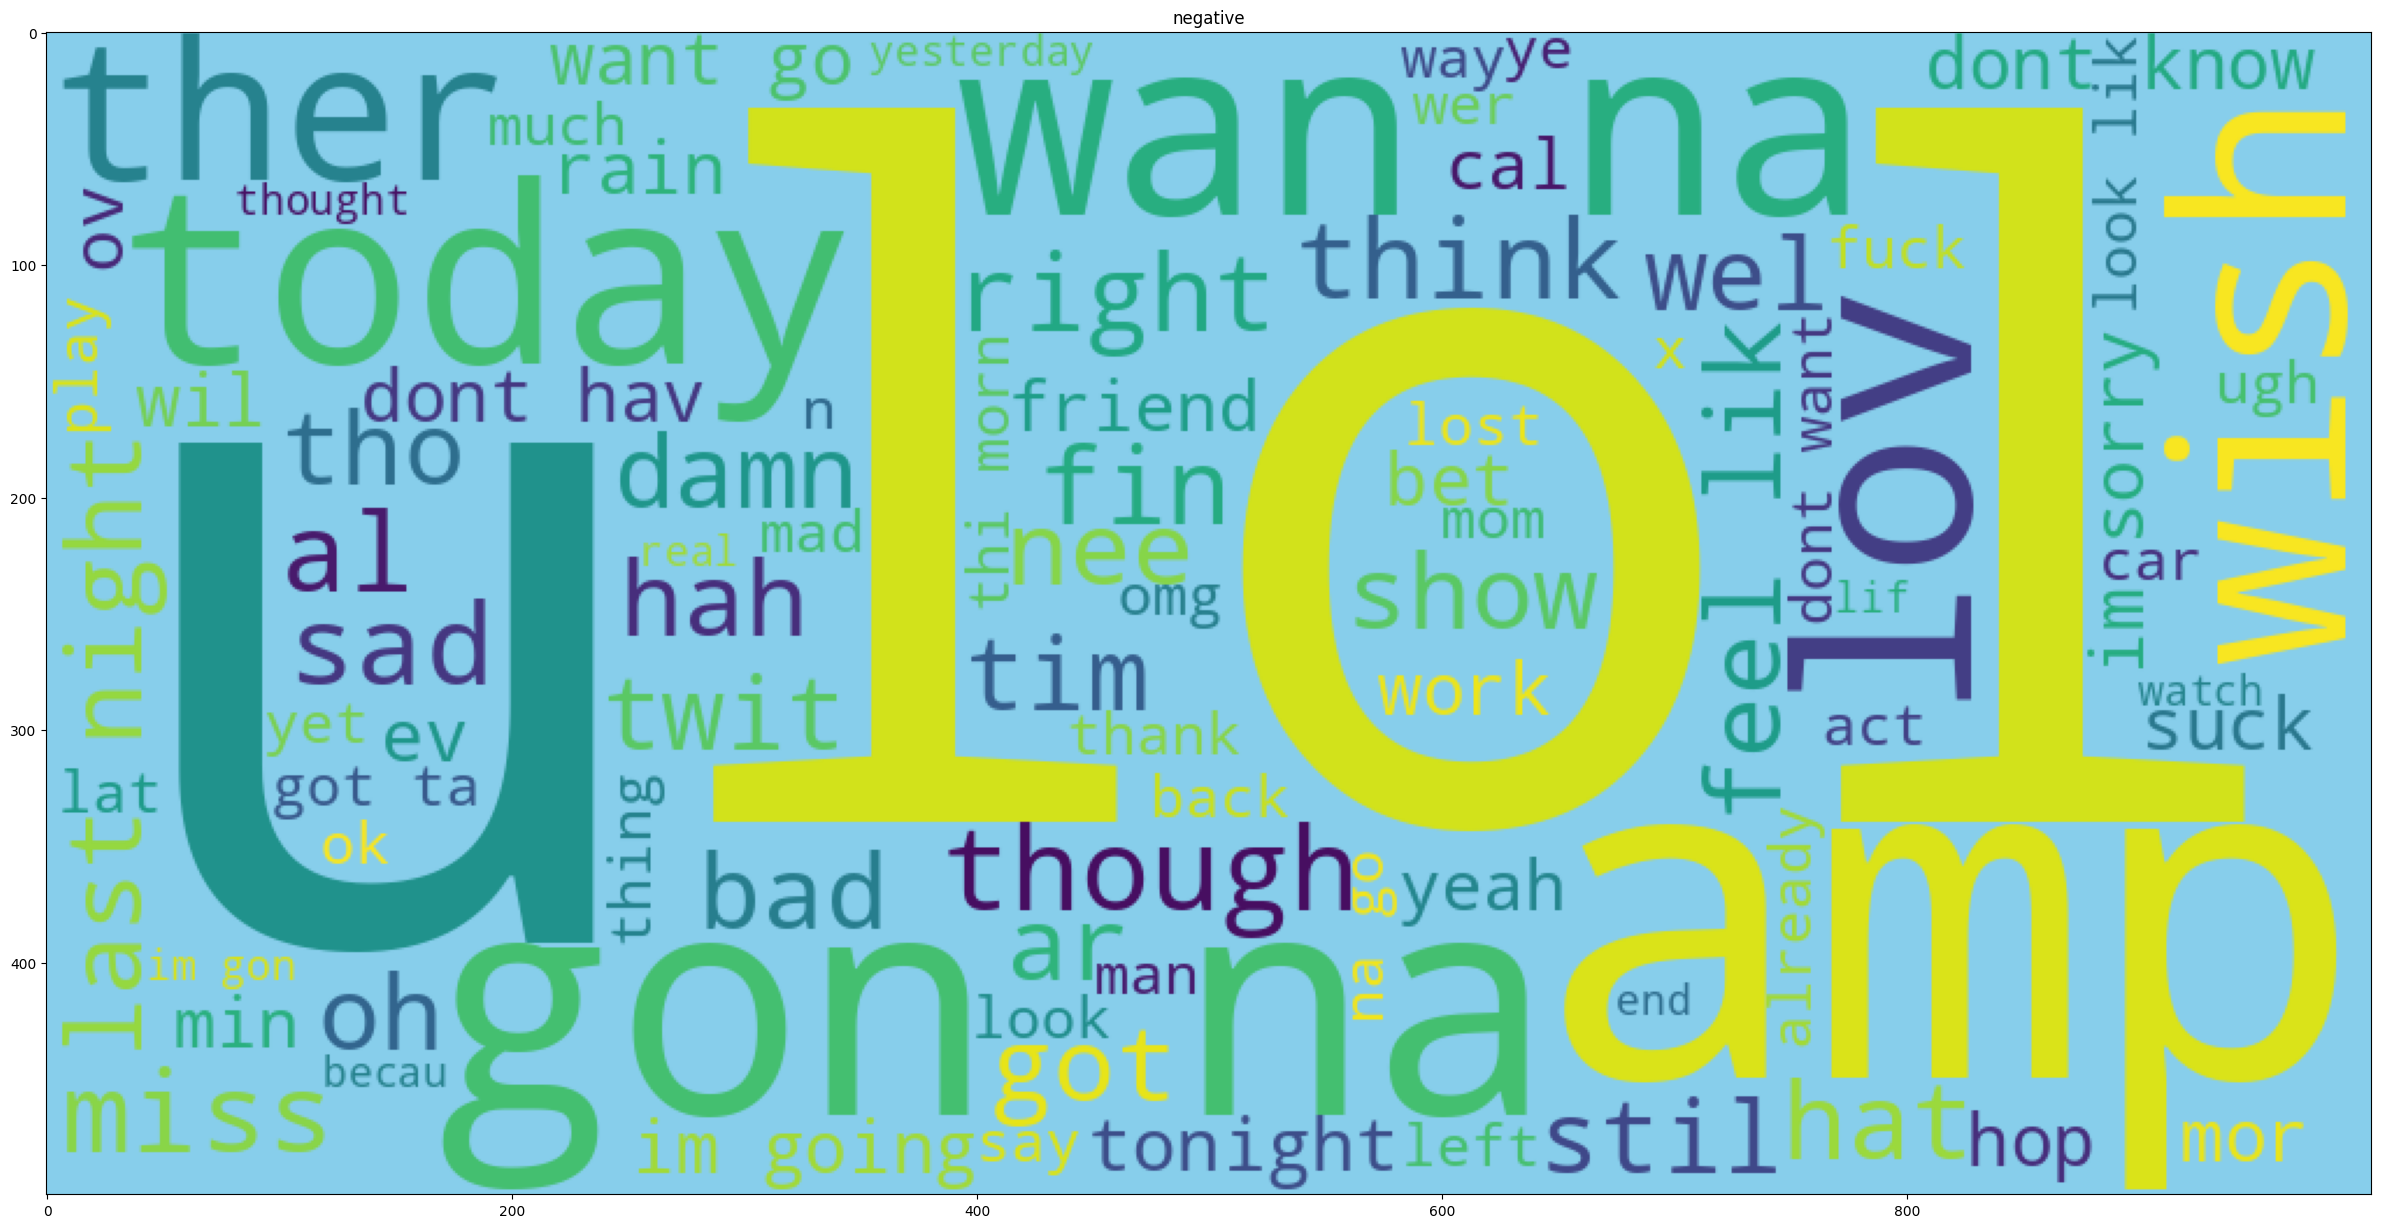

In [ ]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,height=500,background_color='skyblue'
  ,max_words = 90).generate(negative_all)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

**Step 6:- Feature extraction from text using TF-IDF Vectorizor**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Convert the list of tokens to a single string in each row

df['text'] = df['text'].apply(lambda tokens: ' '.join(map(str, tokens)))
tfidf = TfidfVectorizer()

# Fit and transform the text
X = tfidf.fit_transform(df['text'])
y = df['sentiment']

In [ ]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1048567    4
1048568    4
1048569    4
1048570    4
1048571    4
Name: sentiment, Length: 1048572, dtype: int64

**Step 7:- Loading Model and Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model= LogisticRegression(max_iter=600)


In [ ]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=600)

**Step 8:- Tesing and Evaluation using Accuracy and confusion matrix.**

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
acc=accuracy_score(y_test,y_pred)
acc

0.8363254893546003

In [ ]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[151692,   8438],
       [ 25887,  23698]])

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90    160130
           4       0.74      0.48      0.58     49585

    accuracy                           0.84    209715
   macro avg       0.80      0.71      0.74    209715
weighted avg       0.83      0.84      0.82    209715

